In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv("ESS.csv")

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [7]:
df['year'].value_counts()

7    4297
6    4297
Name: year, dtype: int64

In [33]:
df['cntry'].value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

- First, Need to see if people's trust went up or down from 2012 to 2014. 2012 is 6 in the dataset and 2014 is 7. 
- Then, need to filter that by each country (Countries are: ES, SE, CH, NO, CZ, DE) 
- From using loc and filter by year, I can see that people's trust went down from 2012 to 2014 (by looking at the mean score) 

In [55]:
df['cntry'].value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [56]:
df_new = df[['cntry', 'year', 'ppltrst']]

In [57]:
df_new.head()

,cntry,year,ppltrst
0,CH,6,3.0
1,CH,6,5.0
2,CH,6,8.0
3,CH,6,6.0
4,CH,6,6.0


## Overall Trust:

Overall Trust went down compared to 2012 to 2014 as shown by the mean reports of these two years below.

In [60]:
df_new.groupby(['year']).mean()

,ppltrst
year,
6,5.563098
7,5.556720


## Trust by Country:

- CH - Trust went up in 2014 than 2012
- CZ - Trust went up in 2014 than 2012 
- DE - Trust went up in 2014 than 2012
- ES - Trust went down in 2014 than 2012 
- NO - Trust went down in 2014 than 2012 
- SE - Trust went went up in 2014 than 2012

In [59]:
df_new.groupby(['year', 'cntry']).mean()

ppltrst
year cntry          
6    CH     5.677878
     CZ     4.362519
     DE     5.214286
     ES     5.114592
     NO     6.649315
     SE     6.058499
7    CH     5.751617
     CZ     4.424658
     DE     5.357143
     ES     4.895128
     NO     6.598630
     SE     6.257709

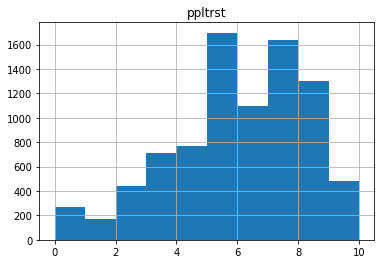

In [63]:
df_new[['ppltrst']].hist(sharey = True, sharex = True)
plt.show()

In [73]:
print(stats.ttest_ind(df_new['cntry']== 'CH', df_new['cntry'] == 'CZ'))
print(stats.ttest_ind(df_new['cntry']== 'CH', df_new['cntry'] == 'DE'))
print(stats.ttest_ind(df_new['cntry']== 'CH', df_new['cntry'] == 'ES'))
print(stats.ttest_ind(df_new['cntry']== 'CH', df_new['cntry'] == 'NO'))
print(stats.ttest_ind(df_new['cntry']== 'CH', df_new['cntry'] == 'SE'))
print(stats.ttest_ind(df_new['cntry']== 'CZ', df_new['cntry'] == 'DE'))
print(stats.ttest_ind(df_new['cntry']== 'CZ', df_new['cntry'] == 'ES'))
print(stats.ttest_ind(df_new['cntry']== 'CZ', df_new['cntry'] == 'SE'))





Ttest_indResult(statistic=4.71192423359664, pvalue=2.473099785978939e-06)
Ttest_indResult(statistic=42.16756027099922, pvalue=0.0)
Ttest_indResult(statistic=-16.041415898346354, pvalue=1.7163085622420956e-57)
Ttest_indResult(statistic=1.6862640577269659, pvalue=0.09176310155830006)
Ttest_indResult(statistic=-5.1957094835653646, pvalue=2.0627122079749921e-07)
Ttest_indResult(statistic=38.10513273559336, pvalue=4.507207579690115e-305)
Ttest_indResult(statistic=-20.770434231049585, pvalue=1.1632093654768037e-94)
Ttest_indResult(statistic=-9.90723141322981, pvalue=4.465090939983607e-23)


## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

The question is asking:

- What happened to happiness stats from 2012 to 2014
- Have to compare results to each country

In [74]:
df_happy = df[['cntry', 'year', 'happy']]

####  Overall happiness seems to have gone down in 2014 compared to 2012 

In [76]:
df_happy.groupby(['year']).mean()

,happy
year,
6,7.723573
7,7.665734


### Overall happiness by country:

- CH happiness went up in 2014 compared to 2012
- CZ happiness went up in 2014 compared to 2012
- DE happiness went  up in 2014 compared to 2012
- ES happiness went down in 2014 compared to 2012
- NO happiness went down in 2014 compared to 2012
- SE happiness went up in 2014 compared to 2012

In [77]:
df_happy.groupby(['year', 'cntry']).mean()

happy
year cntry          
6    CH     8.088312
     CZ     6.770898
     DE     7.428571
     ES     7.548680
     NO     8.251719
     SE     7.907387
7    CH     8.116429
     CZ     6.914110
     DE     7.857143
     ES     7.419967
     NO     7.915185
     SE     7.946961

In [78]:
print(stats.ttest_ind(df_happy['cntry']== 'CH', df_happy['cntry'] == 'CZ'))
print(stats.ttest_ind(df_happy['cntry']== 'CH', df_happy['cntry'] == 'DE'))
print(stats.ttest_ind(df_happy['cntry']== 'CH', df_happy['cntry'] == 'ES'))
print(stats.ttest_ind(df_happy['cntry']== 'CH', df_happy['cntry'] == 'NO'))
print(stats.ttest_ind(df_happy['cntry']== 'CH', df_happy['cntry'] == 'SE'))
print(stats.ttest_ind(df_happy['cntry']== 'CZ', df_happy['cntry'] == 'DE'))
print(stats.ttest_ind(df_happy['cntry']== 'CZ', df_happy['cntry'] == 'ES'))
print(stats.ttest_ind(df_happy['cntry']== 'CZ', df_happy['cntry'] == 'SE'))






Ttest_indResult(statistic=4.71192423359664, pvalue=2.473099785978939e-06)
Ttest_indResult(statistic=42.16756027099922, pvalue=0.0)
Ttest_indResult(statistic=-16.041415898346354, pvalue=1.7163085622420956e-57)
Ttest_indResult(statistic=1.6862640577269659, pvalue=0.09176310155830006)
Ttest_indResult(statistic=-5.1957094835653646, pvalue=2.0627122079749921e-07)
Ttest_indResult(statistic=38.10513273559336, pvalue=4.507207579690115e-305)
Ttest_indResult(statistic=-20.770434231049585, pvalue=1.1632093654768037e-94)
Ttest_indResult(statistic=-9.90723141322981, pvalue=4.465090939983607e-23)


## Who reported watching more TV in 2012, men or women?


In [81]:
df_tv = df[['tvtot', 'gndr', 'year']]

In [82]:
df_tv.head()

,tvtot,gndr,year
0,3.0,2.0,6
1,6.0,2.0,6
2,1.0,1.0,6
3,4.0,2.0,6
4,5.0,2.0,6


In [102]:
df_tv_2012 = df_tv.where(df['year'] == 6)

In [85]:
men_tv = df_tv[(df_tv.year == 6) | (df_tv.gndr == 2)]

In [88]:
women_tv = df_tv[(df_tv.year == 6) | (df_tv.gndr == 1)]

### Men watched more TV in hours in average compared to women in 2012. 

In [91]:
men_tv.tvtot.mean()

3.8925891181988743

In [93]:
women_tv.tvtot.mean()

3.865003099814011

In [103]:
print(stats.ttest_ind(df_tv_2012['gndr']== 2, df_tv_2012['gndr'] == 1))

Ttest_indResult(statistic=-0.19375574217224856, pvalue=0.8463694327079156)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog= df_tv_2012,      # Data
                          groups= df_tv_2012['gndr'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  